## What are the most common programming languages used in India?
#### Data Science Project by Jaskaran Singh
_ _ _ 

A data analysis using Stackoverflow’s 2018 and 2019 Annual Developer Survey

<img src="https://miro.medium.com/max/2400/0*UEtwA2ask7vQYW06.png" alt="Kitten"
	title="A cute kitten" width="350" height="200" />

### Introduction

With the advent of new areas in India such as Artificial Intelligence and Data Science, many programming languages that were poorly spoken and used are now experiencing a rise in popularity.<br/>

You may have already heard “Python is the programming language of the moment” or “Functional Paradigm is much better than Object Oriented”.<br/>

In this article, we are going to analyze real data to verify if these programming languages are really being used in India or if they are just rumors.<br/>

For this, we are going to use data from Stackoverflow’s 2018 and 2019 Annual Developer Survey.<br/>

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, jobs, code style and various other information.<br/>
There were more than 150 questions as a part of the survey, including:

- “What frameworks do you work with?”
- “Do you program as a hobby or contribute to open source projects?”
- “What IDE do you work with?”

In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
# to plot charts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# to visualise all th columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [4]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# reading the stackoverflow dataset for 2018 and 2019
df_2018 = pd.read_csv('survey_results_2018.csv')
df_2019 = pd.read_csv('survey_results_2019.csv')

In [6]:
# overview of df_2015
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [7]:
# overview of df_2019
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

### Q1. What programming languages are most used to work and which programming languages are most required?

In our datset we have fields for __LanguageWorkedWith__ which shows the language people using at their work which is a good parameter to analyze the most popular language in the country. We also have a field for __LanguageDesireNextYear__ which will give us the details of programming languages people want to learn in future which is a good factor to analyze which programming language is gaining popularity in the country. So using these two field for year 2018 and 2019 we will analyze and see the current scenerio of programming languages in India

In [8]:
# function to filter country data
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

#### Why I dropped NA values instead of imputing them?

Here above I have applied dropna with axis=0 i.e. removing rows with NA values because for subset parameter in dropna function I have used the two major columns for analysis which are __LanguageWorkedWith__ and __LanguageDesireNextYear__. These field donot have numeric values so imputing them with mean or median is not possible. Mode could have been considered but as percentage missing values are close to 26% in these columns, it will affect the final results of analysis.

And we are only concentrated on two columns so rest of the data doesn't matter much.

In [9]:
# filter the dataframe by India and selecting some columns
india_2018 = filter_country(df_2018, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
india_2019 = filter_country(df_2019, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [10]:
# splitting the columns
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

In [11]:
# Splitting the Data Frame by column into a Series. 
worked_lang_2018 = split_column(india_2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_column(india_2018, 'LanguageDesireNextYear')

worked_lang_2019 = split_column(india_2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_column(india_2019, 'LanguageDesireNextYear')

In [12]:
# from a nested list create a flat list
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

In [13]:
# flatting nested list objects.
list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)

list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)

In [14]:
# grouping a list
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

In [15]:
# groping a list and creating a dict.
dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2018')

dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2019, '2019')

In [16]:
# creating dataframe
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

In [17]:
# creating a data frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2018, dict_worked_languages_2019])
wanted_languages = create_dataframe([dict_wanted_languages_2018, dict_wanted_languages_2019])

In [18]:
# calculate percentage of programming languages
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [19]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

# Setting up data for plotting
worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

In [20]:
# Top Working Languages in India
i = 1
print("Top Working Languages in India")
for lang in top_10_worked_lang:
    print("{} : {}".format(i,lang))
    i += 1

Top Working Languages in India
1 : JavaScript
2 : HTML/CSS
3 : HTML
4 : CSS
5 : SQL
6 : Java
7 : Python


In [21]:
# Top Wanted Programming Languages in India
i = 1
print("Top Wanted Languages in India")
for lang in top_10_wanted_lang:
    print("{} : {}".format(i,lang))
    i += 1

Top Wanted Languages in India
1 : JavaScript
2 : Python
3 : HTML/CSS
4 : SQL
5 : HTML
6 : Java
7 : CSS


We can observe that __JavaScript, HTML and CSS__ are the most popular programming languages which shows people are much into the Web Development stuff. Although classic programming languages like __SQL and JAVA__ are very popular.<br/><br/>
__Python__ is gaining a momentum specially in the Wanted Languages(Languages people want to learn in Future) and has a bright future ahead. This shows there is a lot of scope for Data Science and Machine Learning in India are no. of jobs are more as compared to no. of skilled programmers in Python.
<br/><br/>
__JAVA__ which once used to be the most popular language in India is having a downwards trend but still has a decent trend in India

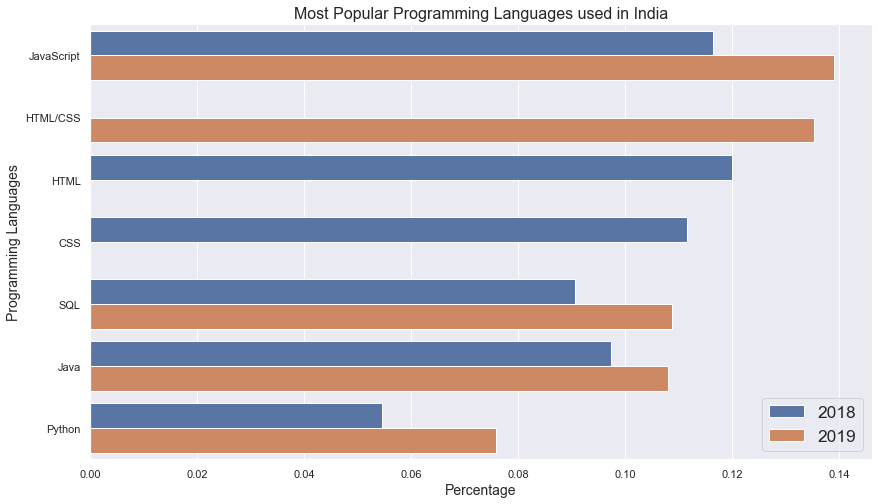

In [22]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Popular Programming Languages used in India', size = 16)
plt.show()

### Q2. What are the most wanted programming languages in India?

We can see that __Python__ have grown tremendously close to other languages. This is probably happening because its’s a programming language that is very versatile and has been used extensively in data related areas.
<br/><br/>
Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

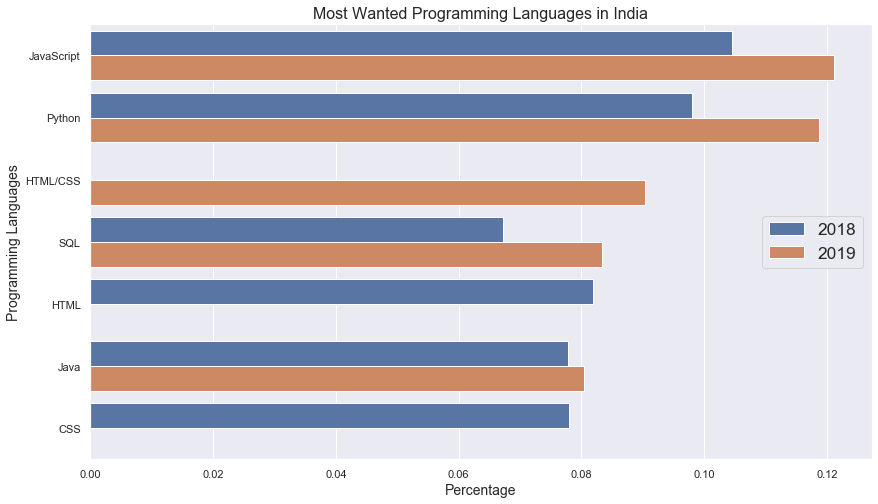

In [23]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most Wanted Programming Languages in India', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [24]:
# seperating working data for year 2018 and 2019
workedLang = worked_lang_chart.sort_values(by='Percentage', ascending=False)
workedLang_2018 = workedLang[workedLang['Year'] == '2018']
workedLang_2019 = workedLang[workedLang['Year'] == '2019']

#seperating wanting data for year 2018 and 2019
wantedLang = wanted_lang_chart.sort_values(by='Percentage', ascending=False)
wantedLang_2018 = wantedLang[wantedLang['Year'] == '2018']
wantedLang_2019 = wantedLang[wantedLang['Year'] == '2019']


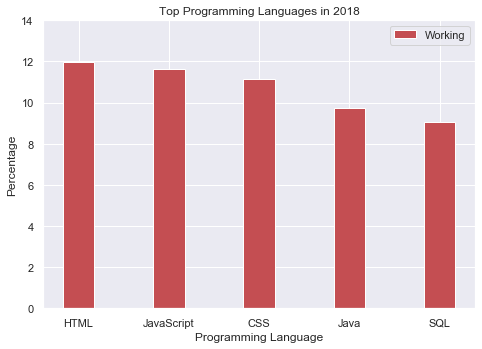

In [25]:
N = 5
workedLang = workedLang_2018['Percentage'][:N]*100
ind = workedLang_2018['Programming Language'][:N] 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, workedLang, width, color='r')
ax.set_ylabel('Percentage')
ax.set_xlabel('Programming Language')
ax.set_title('Top Programming Languages in 2018')
ax.set_yticks(np.arange(0, 15, 2))
ax.legend(labels=['Working'])
plt.show()

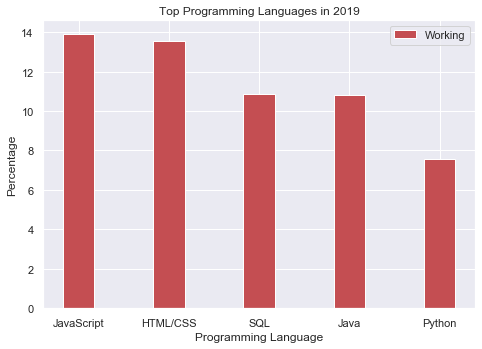

In [26]:
N = 5
workedLang = workedLang_2019['Percentage'][:N]*100
ind = workedLang_2019['Programming Language'][:N] 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, workedLang, width, color='r')
ax.set_ylabel('Percentage')
ax.set_xlabel('Programming Language')
ax.set_title('Top Programming Languages in 2019')
ax.set_yticks(np.arange(0, 15, 2))
ax.legend(labels=['Working'])
plt.show()

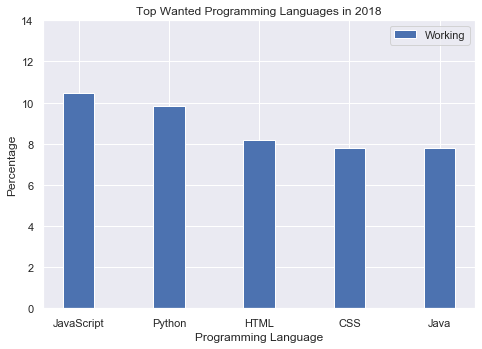

In [27]:
N = 5
wantedLang = wantedLang_2018['Percentage'][:N]*100
ind = wantedLang_2018['Programming Language'][:N] 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, wantedLang, width, color='b')
ax.set_ylabel('Percentage')
ax.set_xlabel('Programming Language')
ax.set_title('Top Wanted Programming Languages in 2018')
ax.set_yticks(np.arange(0, 15, 2))
ax.legend(labels=['Working'])
plt.show()

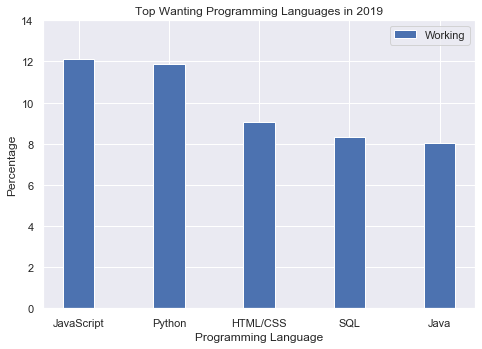

In [28]:
N = 5
wantedLang = wantedLang_2019['Percentage'][:N]*100
ind = wantedLang_2019['Programming Language'][:N] 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, wantedLang, width, color='b')
ax.set_ylabel('Percentage')
ax.set_xlabel('Programming Language')
ax.set_title('Top Wanting Programming Languages in 2019')
ax.set_yticks(np.arange(0, 15, 2))
ax.legend(labels=['Working'])
plt.show()

We can observe that How __Python__ has increased it's percentage from 10% to more than 12% in the most wanting programming languages. This shows the interest people are giving in learning Python.<br/>

The popularity of Web Languages like __HTML,CSS and JavaScript__ are still having a great momentum. It is because many people tend to go for Computer Courses without any science/engineering background and Web Development is the most easy field to go for.

### Q3. How does programming languages used at work relates with programming languages people want to learn?

By looking at the raw data, we can spot some patterns such as for people that use __python__ at work, for example, python is also cited as language that those people wanted to learn in the next year.

A natural question arise:

“The pattern observed for python holds for the other languages?”

To address this question, we built a heat map that indicate how the work programming languages were related to the desired programming languages. __The darker the position gets, the more related the programming language is.__

In [29]:
# Grouping data to create a new dataframe

rows = []
for itens in list(zip(worked_lang_2018, wanted_lang_2018)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [30]:
# Creating a matrix
for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

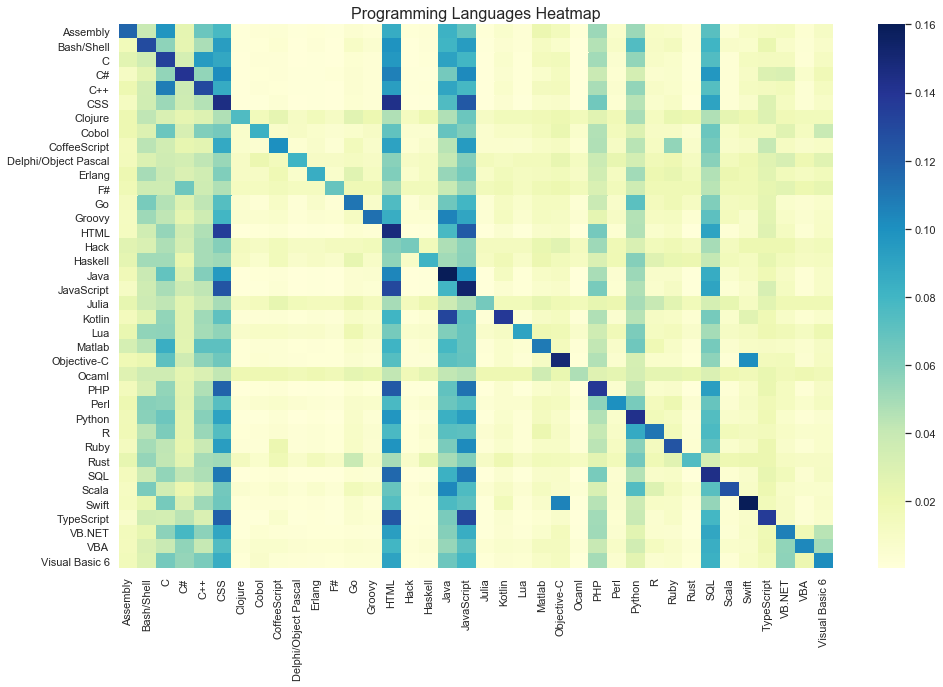

In [31]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2018.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

With this figure we can have two insights:
1. As is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.
2. People who work with a programming language of a specific area, tend to want to learn programming languages ​​of the same area. For example: HTML is strongly correlated with CSS and JavaScript.

### Conclusion

We went through the most popular and most wanted programming languages in 2018 and 2019 according to Stackoverflow's Annual Developer Survey Data

1. We have observe Web Languages like __HTML,CSS and JAVAScript__ are very popular in India dominate the market.
2. Programming Language like __Python__ has grown in recent years and is 2nd in the list of most wanted Programming Languages which shows people have a keen interest in learning Python as sectors like Data Science and Machine Learning grow in India.
3. __JAVA__ is still popular in India but JavaScript and Python are capturing the market in near future.
4. SQL is also popular among programmers and mostly used for DBMS in India

### References

Blog Link: [Click Here](https://medium.com/@jaskaranbhatia/what-are-the-most-common-programming-languages-used-in-india-19fdfa65a0cf)<br/>
Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey)<br/>
GitHub Repo:[https://github.com/jaskaranbhatia/Write-A-DataScience-Blog](https://github.com/jaskaranbhatia/Write-A-DataScience-Blog)